## single tree 

better version of tree.ipynb

In [18]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics    # contains all the effectivness idexes 
import pandas as pd    # for the dataset
from matplotlib import pyplot as plt
import numpy as np

#### importing and preparing the dataset

In [2]:
labels = ['class', 'spec_number', 'eccentr', 'asp_ratio', 'elong', 'solidity', 'stoch_conv', 'iso_factor', 'max_ind_depth', 'lobedness', 'av_intensity', 'av_contr', 'smooth', 'third_mom', 'unif', 'entropy']

df = pd.read_csv(r'./leaf/leaf.csv', header = None, names = labels)

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column

display(df)

,class,spec_number,eccentr,asp_ratio,elong,solidity,stoch_conv,iso_factor,max_ind_depth,lobedness,av_intensity,av_contr,smooth,third_mom,unif,entropy
0,28,12,0.93323,3.2220,0.69174,0.95791,1.00000,0.48142,0.022654,0.093403,0.075307,0.175610,0.029915,0.011062,0.000400,1.42150
1,4,8,0.53017,1.2503,0.23254,0.97337,1.00000,0.82703,0.006626,0.007991,0.048541,0.109410,0.011828,0.002781,0.000488,1.54520
2,15,1,0.41320,1.0384,0.48465,0.78118,0.87018,0.30478,0.080722,1.185900,0.047303,0.126190,0.015674,0.005899,0.000190,1.48900
3,9,1,0.47821,1.2059,0.34976,0.90378,0.99649,0.51298,0.030166,0.165610,0.082509,0.173470,0.029213,0.009305,0.000679,1.59560
4,1,7,0.82063,1.7529,0.44458,0.97964,0.99649,0.76770,0.005928,0.006395,0.018375,0.080587,0.006452,0.002271,0.000041,0.53904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,6,8,0.47815,1.1032,0.52998,0.81654,0.81930,0.33753,0.115470,2.426800,0.006859,0.042071,0.001767,0.000476,0.000014,0.30832
336,30,10,0.39606,1.1647,0.29415,0.94064,0.99298,0.54860,0.025244,0.115980,0.051625,0.120140,0.014228,0.003721,0.000382,1.49430
337,12,12,0.87259,2.1845,0.56922,0.93969,0.99474,0.52611,0.044598,0.361990,0.060388,0.142270,0.019839,0.006271,0.000315,1.49690
338,33,1,0.69887,1.4947,0.34694,0.97906,1.00000,0.74423,0.007045,0.009032,0.067277,0.158090,0.024383,0.007984,0.000669,1.25540


In [3]:
x = df.iloc[:, 1:16]
y = df.iloc[:, 0]

#### finding best hyper-parameters

In [4]:
# names of all effectivness indexes available in sklearn

# note that roc_auc doesn't work in cv because it is a multiclass classification (we need to specify
# ovo or ovr) and that all roc_auc variants don't work in loocv because the testing sets contain
# only one observation

print(metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

In [11]:
# using grid search with k-fold CV to find the best hyperparameters and fitting the tree

# best_score non è uguale ad ogni run

k = 5

grid_param = {'criterion': ['gini', 'entropy'], 'min_samples_split': np.array(range(2, 8))}
t_cv = GridSearchCV(tree.DecisionTreeClassifier(), grid_param, cv=k, scoring='roc_auc_ovo')
t_cv.fit(x, y)
print(t_cv.best_params_)
print(t_cv.best_score_)

{'criterion': 'gini', 'min_samples_split': 7}
0.8164048531289911


In [10]:
# using now grid search with loocv

grid_param = {'criterion': ['gini', 'entropy'], 'min_samples_split': np.array(range(2, 8))}
t_loocv = GridSearchCV(tree.DecisionTreeClassifier(), grid_param, cv=LeaveOneOut(), scoring='accuracy')
t_loocv.fit(x, y)
print(t_loocv.best_params_)
print(t_loocv.best_score_)

{'criterion': 'entropy', 'min_samples_split': 6}
0.65


#### fitting the trees

In [15]:
t_cv_instance = t_cv.best_estimator_
t_loocv_instance = t_loocv.best_estimator_

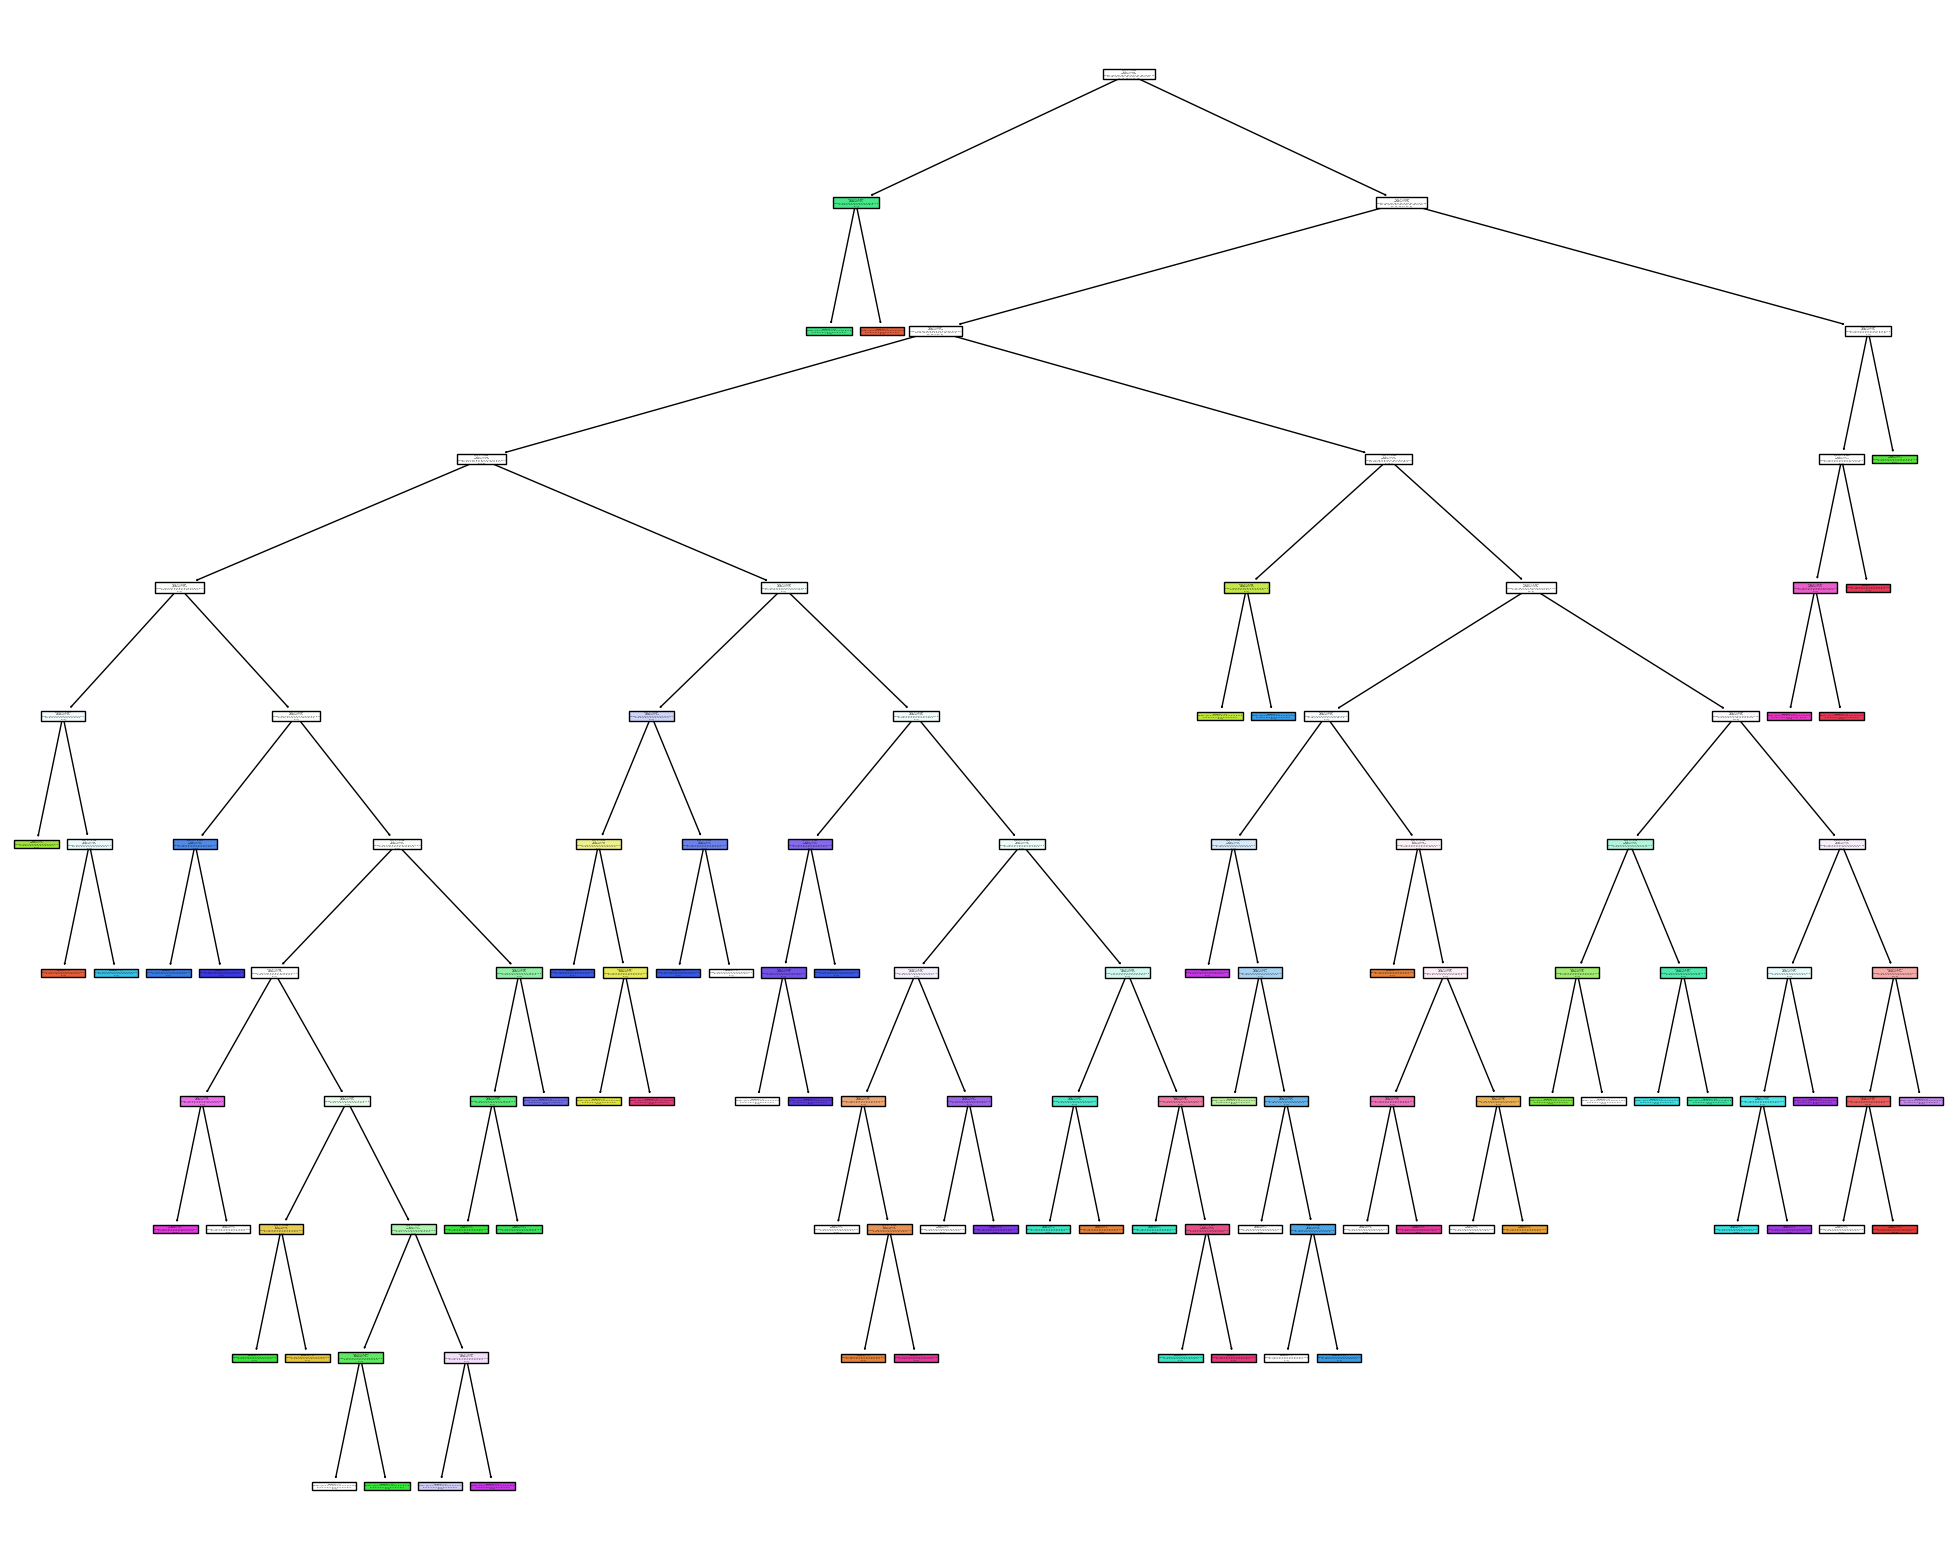

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(t_cv_instance, filled=True)

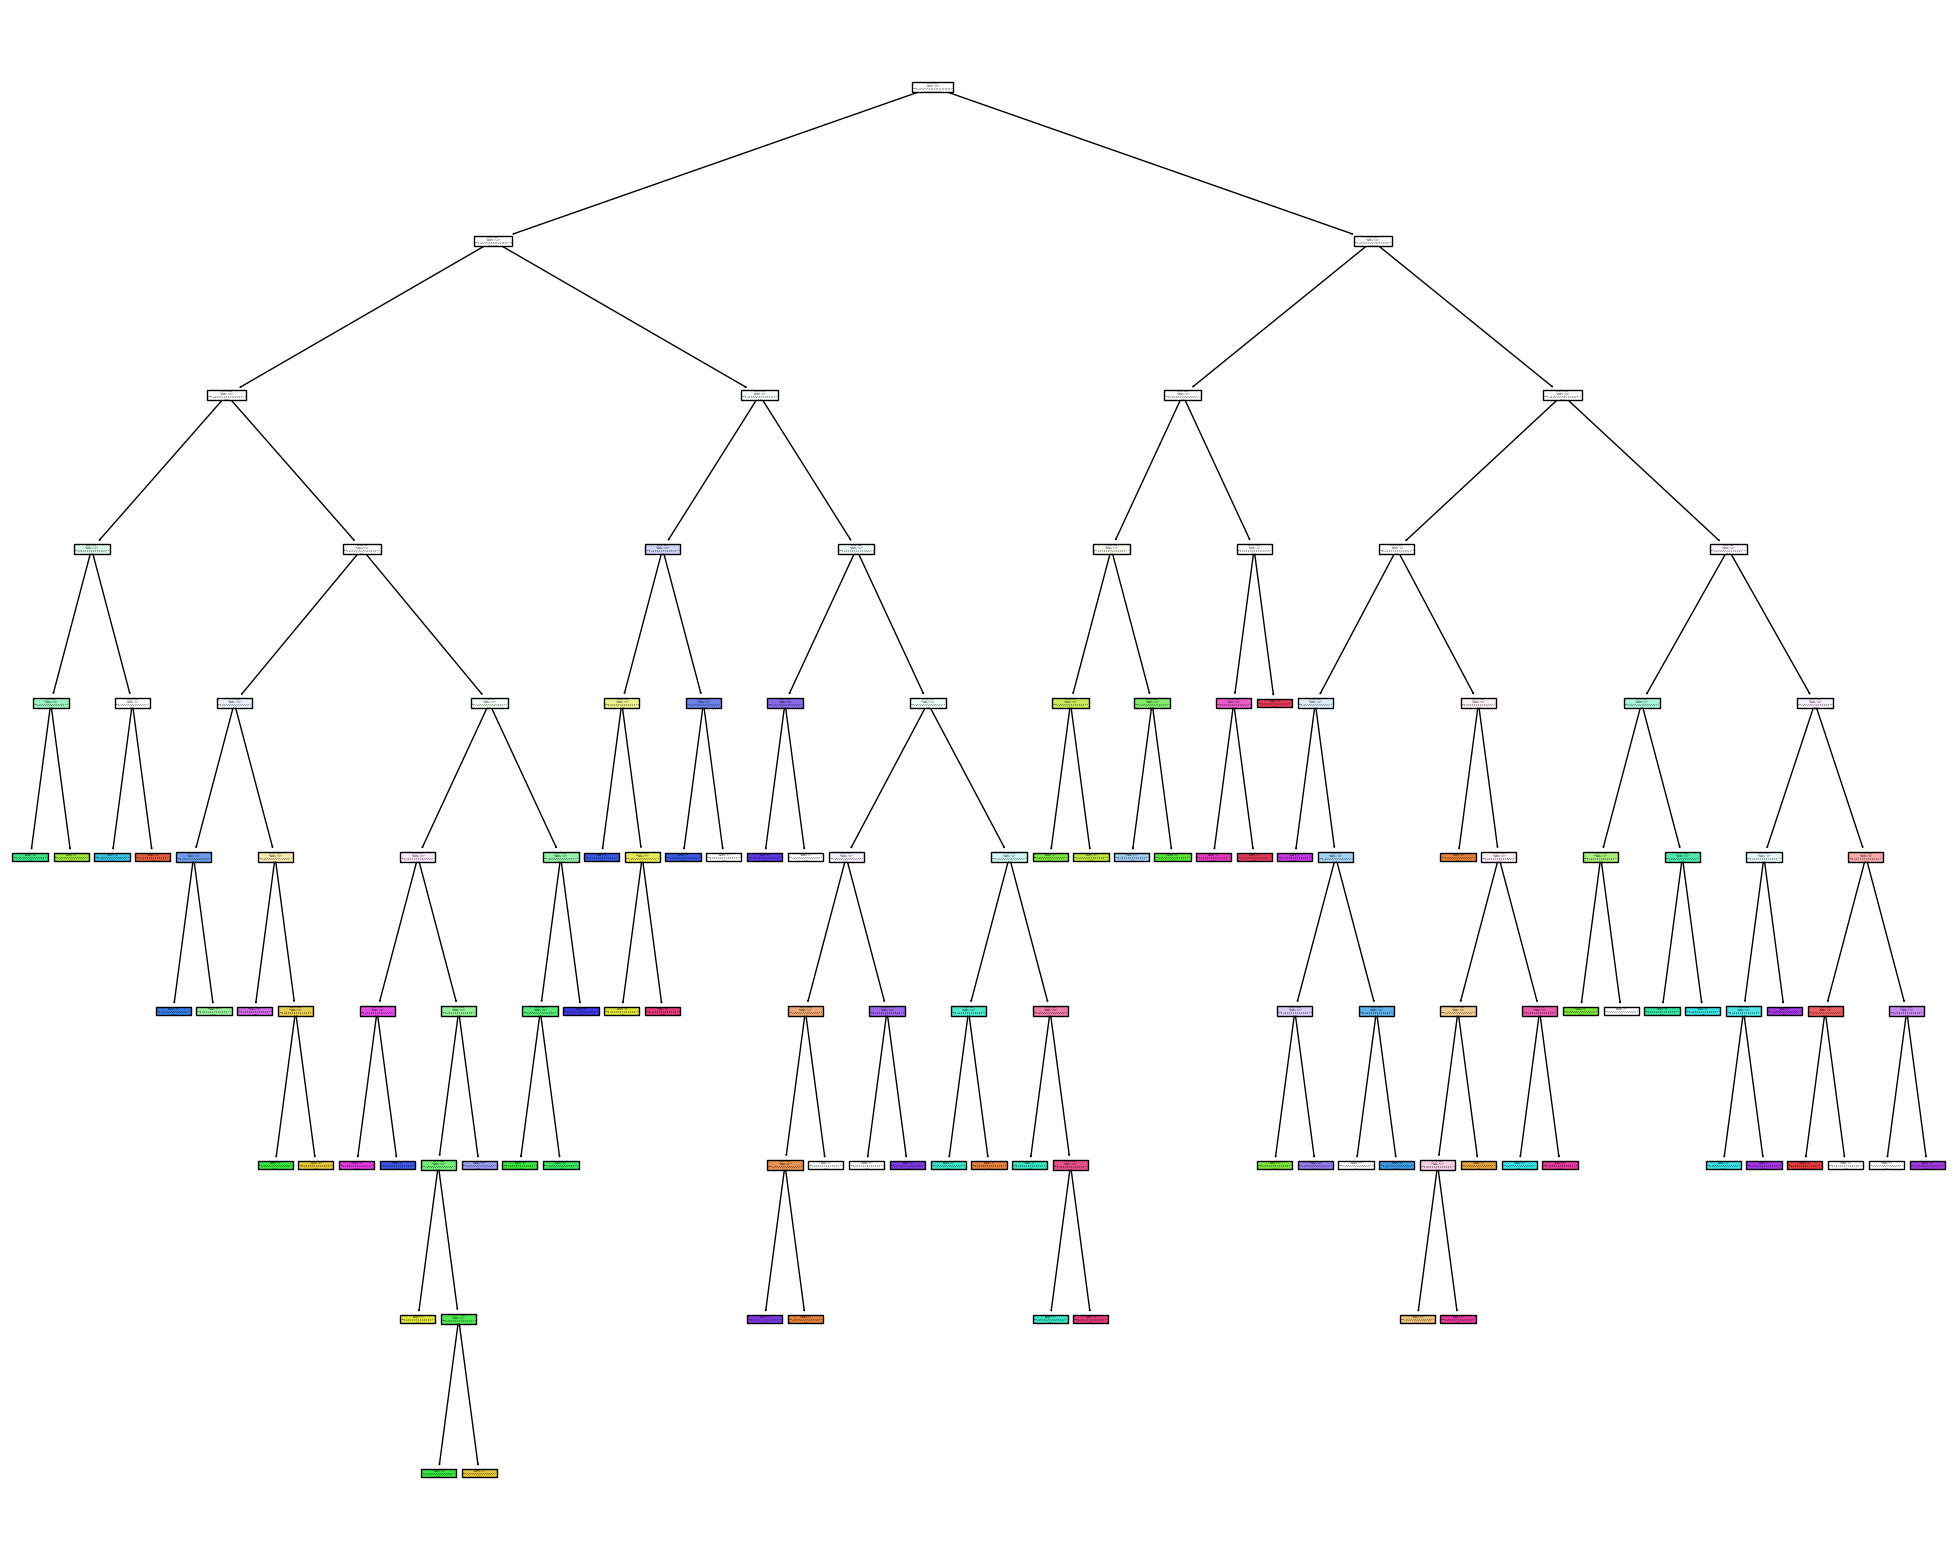

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(t_loocv_instance, filled=True)